In [1]:
%pylab inline
import seaborn
from pandas import Series, DataFrame
from pandas_datareader.data import DataReader
from wallet.core import create_app
from wallet.model.m1 import M1Portfolio
from wallet.util.analysis import _moving_average_statistics
app = create_app(compact=True)

Populating the interactive namespace from numpy and matplotlib


[2020-09-05 18:26:59,445] INFO in core: Started 


2020-07-31


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
S&P 500,21.0,0.269071,0.273096,-0.456258,-0.167184,0.319281,0.607510,0.644441,0.955966,4.915478,4.229803,-0.876447
M1,21.0,0.143868,0.216157,-0.195526,-0.187900,0.193481,0.464505,0.471521,0.628558,2.416594,2.967650,-0.053660
Robinhood,21.0,0.530622,1.218321,-1.709414,-1.356544,0.637969,2.206550,3.198240,0.428970,3.940362,12.771155,0.230332
CSI 300,21.0,0.136144,0.401064,-0.687646,-0.435161,0.173000,0.767233,0.782891,0.319511,4.650485,3.374322,-0.195816
IRA,21.0,0.120765,0.386152,-0.597531,-0.514190,0.168673,0.641984,0.758669,0.292023,0.993106,5.162928,-0.277716


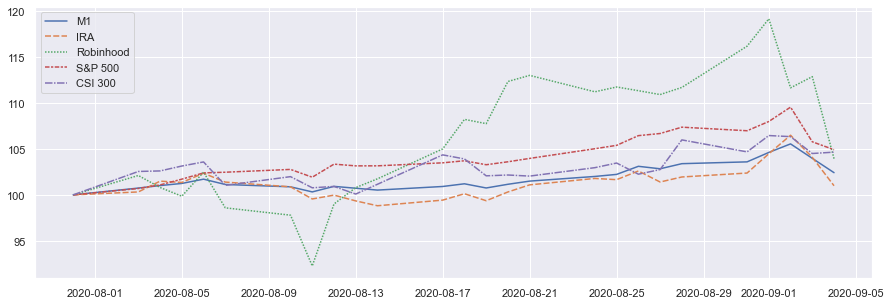

In [2]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 21 + 5)})
    ira = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Roth IRA', 21 + 5)})
    rh = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Robinhood', 21 + 5)})
print(m1.index[0])
data = DataReader(['SPY', 'ASHR'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
    'IRA': ira,
    'Robinhood': rh,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
seaborn.lineplot(data=frame)
_moving_average_statistics(frame, 5)

2020-02-07 55


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
CSI 300,126.0,0.148717,0.399052,-0.766161,-0.594231,0.173423,0.888813,1.085223,0.352627,29.177336,18.214996,-0.059774
S&P 500,126.0,0.065898,0.576946,-1.834480,-1.329398,0.243205,0.643120,1.014842,0.100353,4.184462,33.717265,-1.671366
IRA,126.0,0.036509,0.783157,-2.461700,-1.534423,0.214350,0.985906,2.073224,0.036403,2.855554,46.663512,-1.209568
M1,126.0,-0.000576,0.387894,-1.190283,-0.907269,0.128591,0.354858,0.592399,-0.022108,-0.822028,23.204696,-1.730903


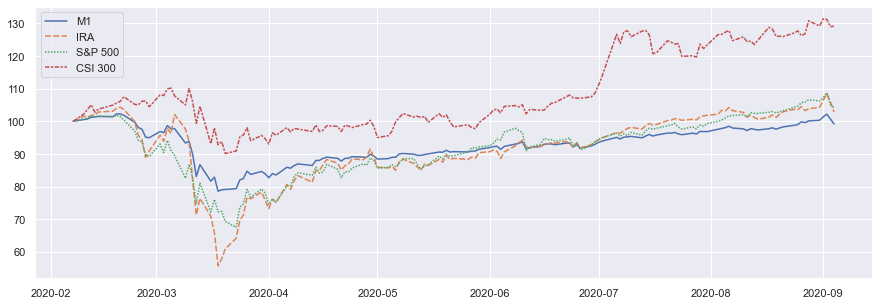

In [3]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 126 + 21)})
    ira = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Roth IRA', 126 + 21)})
    rh = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Robinhood', 126 + 21)})
print(m1.index[0], len(rh))
data = DataReader(['SPY', 'ASHR'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
    'IRA': ira,
    # 'Robinhood': rh,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
seaborn.lineplot(data=frame)
_moving_average_statistics(frame, 21)

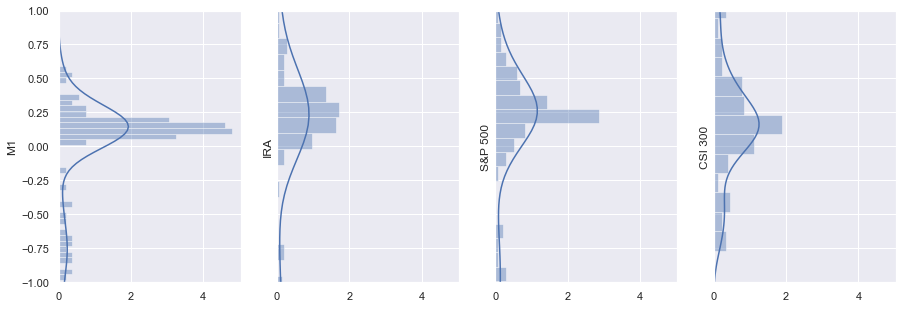

In [4]:
ret = frame.rolling(21).mean().pct_change() * 100
_, axes = plt.subplots(1, len(ret.columns), sharex=True, sharey=True)
for i, col in enumerate((ret.columns)):
    seaborn.distplot(ret[col], ax=axes[i], vertical=True)
_ = plt.setp(axes, ylim=[-1, +1])